# K_Nearest Neighbor Algorithm
Walk-through of KNearset neighbor algorithm using scikit learn.

In [ ]:
#Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
plt.style.use('ggplot')

## Loading Dataset
**Iris** dataset is a default dataset in scikit learn library. Dataset is a dict object.

In [2]:
#Loading Dataset
#Data is a dict object
iris = datasets.load_iris()
print(type(iris.data))
print(type(iris.target))
iris.keys()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Dataset contains 3 classes of Iris flowers **Iris-Setosa**, **Iris-Versicolor** and **Iris-Virginica**.

In [3]:
print(iris.data.shape)
iris.target_names #Names in Target variable

(150, 4)


array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [4]:
X = iris.data #Loading data into X
y = iris.target #Target variablento y
df = pd.DataFrame(X, columns = iris.feature_names) #Pandas dataframe
df.head() #First 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In the scatter matrix below, we can clearly see that petal width and petal length has high correlation.

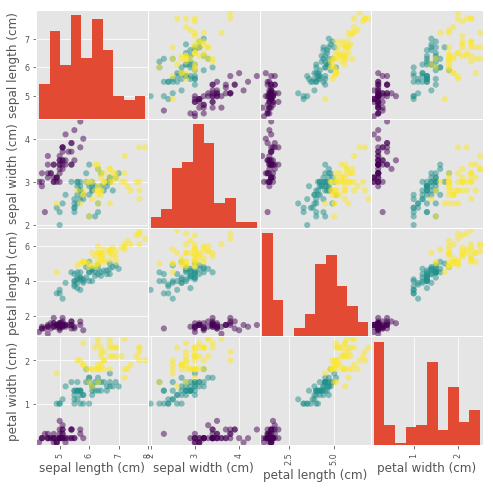

In [5]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = '.'); #c here is for color and s is for shape

### Fitting KNN Classification Model

In [6]:
#Importing sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

### Model Performance

In [8]:
# print(np.mean(pred == y_test)) #Alternate method to get the accuracy score
cm = confusion_matrix(y_test,pred)
accuracy_score(y_test,pred)

0.97777777777777775

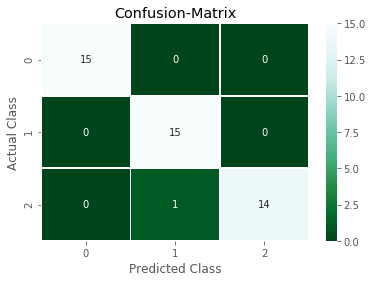

In [9]:
#Plotting Confusion Matrix With Seaborn
sns.heatmap(cm, annot=True, linewidth = 0.8, cmap = 'BuGn_r');
plt.title('Confusion-Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

In [10]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        15
          2       1.00      0.93      0.97        15

avg / total       0.98      0.98      0.98        45



### Further analysis of the wrong prediction
Although we have high accuracy score, it sometimes helps to know the exact wrong prediction.

In [11]:
print('Sample incorrectly classified:')
incorrect_idx = np.where(pred != y_test)[0] #Numpy where function to check where pred != y_test
print(incorrect_idx)

Sample incorrectly classified:
[42]


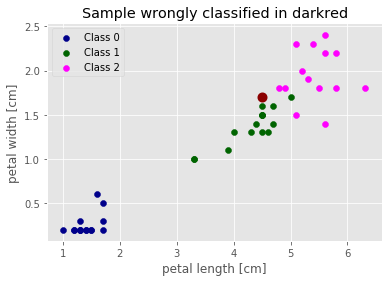

In [12]:
#Plotting the wrong prediction in Darkred
colors = ["darkblue", "darkgreen", "magenta"]

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, 2], X_test[idx, 3], color=color, label="Class %s" % str(n))

# 2 & 3 here are petal length and petal width respectively   
plt.scatter(X_test[incorrect_idx, 2], X_test[incorrect_idx, 3], color="darkred", marker = 'o', linewidth = 4)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc=2)
plt.title("Sample wrongly classified in darkred")
plt.show()

### Plotting Accuracy
Plotting accuracy with varying number of neighbors on both training and test data.

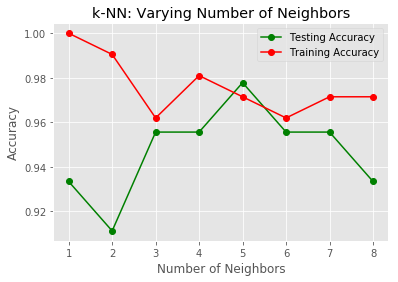

In [13]:
#Plotting accuracy on train and test
neighbors = np.arange(1,9)
#Creating 2 empty lists
test_accuracy = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    #Test & train are empty lists, index 'i' is replacing them with score
    test_accuracy[i] = knn.score(X_test,y_test) #Score returns the MEAN accuracy on the given test data and labels
    train_accuracy[i] = knn.score(X_train,y_train)

#General Plotting
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy',color='g',linestyle='-',marker='o');
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy',color='r',linestyle='-',marker='o');
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()